<a href="https://colab.research.google.com/github/urabayen01/Actividad-1/blob/main/A1_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Regresión lineal simple con Dataset de Airbnb Ciudad de México

In [14]:
#importar Librerías

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NaN

In [16]:
#Leer datos

df=pd.read_csv('listings_AUS.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220912200151,2022-09-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.73
1,5769,https://www.airbnb.com/rooms/5769,20220912200151,2022-09-13,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.75,4.92,NaN,f,1,0,1,0,1.78
2,46856014,https://www.airbnb.com/rooms/46856014,20220912200151,2022-09-12,city scrape,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",Quiet evenings with a beautiful view of the la...,"Starbucks, Shopping center, Grocery Store, Dol...",https://a0.muscache.com/pictures/13ec989b-f3b6...,375760981,...,4.97,4.83,4.77,NaN,t,1,1,0,0,4.17
3,319887,https://www.airbnb.com/rooms/319887,20220912200151,2022-09-13,previous scrape,Quaint East Austin 2BR SXSW 2016,Awesome house in the middle of downtown action...,The neighborhood is the first sub-division in ...,https://a0.muscache.com/pictures/31764696/dbae...,1640158,...,5.00,4.00,4.00,NaN,f,1,1,0,0,0.02
4,319894,https://www.airbnb.com/rooms/319894,20220912200151,2022-09-13,city scrape,The Perfect Austin Modern Home,The home is a 2300 square foot modern style 3 ...,Everyone who lives in Agave - LOVES Agave. It'...,https://a0.muscache.com/pictures/200398af-d3b2...,1640172,...,4.98,4.82,4.88,NaN,f,2,1,1,0,1.34


In [17]:
#Solo tomamos las columnas de interés

df=df[['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness','review_scores_communication', 'room_type']]
df.head()


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,614,95%,$140.00,311,4.84,4.85,4.81,Entire home/apt
1,269,100%,$41.00,3,4.90,4.86,4.94,Private room
2,88,98%,$194.00,342,4.85,4.80,4.97,Entire home/apt
3,2,NaN,$694.00,0,4.50,3.50,5.00,Entire home/apt
4,171,99%,$192.00,156,4.84,4.73,4.98,Entire home/apt


#PUNTO 3

In [18]:
#Quitamos % y $ en las columnas correspondiente
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


number_of_reviews                int64
host_acceptance_rate            object
price                           object
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

In [19]:
print(df.shape) #Número de filas y columnas
Duplicadas=df.duplicated()  #Crea una serie 
print("\nNúmero de filas duplicadas:", Duplicadas[Duplicadas==True].count()) 

(18337, 8)

Número de filas duplicadas: 1061


In [20]:
#Limpieza de filas repetidas
df.drop_duplicates(keep='first', inplace=True)
df.shape

(17276, 8)

In [21]:
#Identificar nulos
df.isnull().sum()

number_of_reviews                 0
host_acceptance_rate           2302
price                             0
availability_365                  0
review_scores_rating           2567
review_scores_cleanliness      2628
review_scores_communication    2629
room_type                         0
dtype: int64

In [22]:
df =df.fillna(method="bfill") 
df =df.fillna(method="ffill") 
df.isnull().sum()

number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [23]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype('int64')
df["price"] = df["price"].astype('float64')
df.dtypes

number_of_reviews                int64
host_acceptance_rate             int64
price                          float64
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

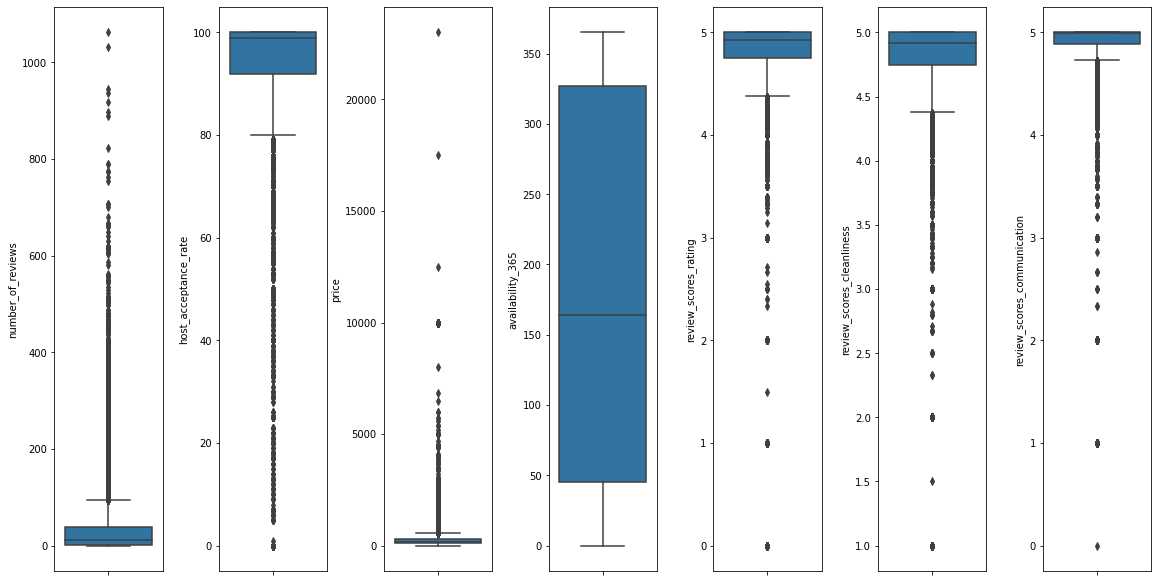

In [24]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

In [25]:
y=df

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_reviews               94.500
host_acceptance_rate           112.000
price                          577.500
availability_365               750.000
review_scores_rating             5.375
review_scores_cleanliness        5.375
review_scores_communication      5.165
dtype: float64
Limite inferior permitido number_of_reviews              -53.500
host_acceptance_rate            80.000
price                         -186.500
availability_365              -378.000
review_scores_rating             4.375
review_scores_cleanliness        4.375
review_scores_communication      4.725
dtype: float64


In [26]:
df=df[df['number_of_reviews']<94.500]
df=df[df['host_acceptance_rate']>80.00]
df=df[df['price']<577.500]
df=df[df['review_scores_rating']>4.375]
df=df[df['review_scores_cleanliness']>4.375]
df=df[df['review_scores_communication']>4.725]
df.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
2,88,98,194.0,342,4.85,4.80,4.97,Entire home/apt
6,13,100,500.0,0,5.00,4.92,4.83,Entire home/apt
16,16,93,140.0,183,5.00,4.94,5.00,Entire home/apt
21,0,100,100.0,0,4.90,4.95,4.94,Private room
25,48,100,60.0,257,4.94,5.00,5.00,Entire home/apt


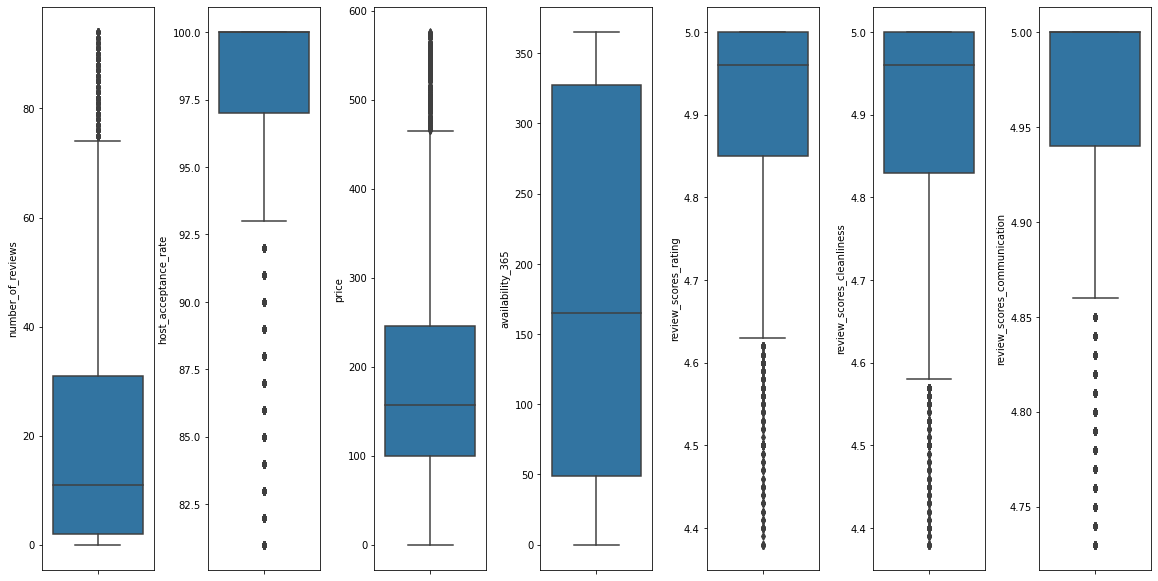

In [27]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

#PUNTO 4

In [28]:
#División en 3 DataFrames

Home=df[df['room_type']=='Entire home/apt']
Room=df[df['room_type']=='Private room']
Shared=df[df['room_type']=='Shared room']
Hotel=df[df['room_type']=='Hotel room']
print(Home.shape)
print(Room.shape)
print(Shared.shape)
print(Hotel.shape)

(7746, 8)
(1539, 8)
(51, 8)
(32, 8)


In [29]:
def correlaciones(i):
  print('number_of_reviews vs host_acceptance_rate: ',abs(i['number_of_reviews'].corr(i['host_acceptance_rate'])))
  print('number_of_reviews  vs review_scores_rating: ',abs(i['number_of_reviews'].corr(i['review_scores_rating'])))
  print('number_of_reviews  vs price: ',abs(i['number_of_reviews'].corr(i['price'])))
  print('number_of_reviews  vs review_scores_cleanliness: ',abs(i['number_of_reviews'].corr(i['review_scores_cleanliness'])))
  print('number_of_reviews  vs availability_365: ',abs(i['number_of_reviews'].corr(i['availability_365'])))
  print('number_of_reviews  vs review_scores_communication: ',abs(i['number_of_reviews'].corr(i['review_scores_communication'])))

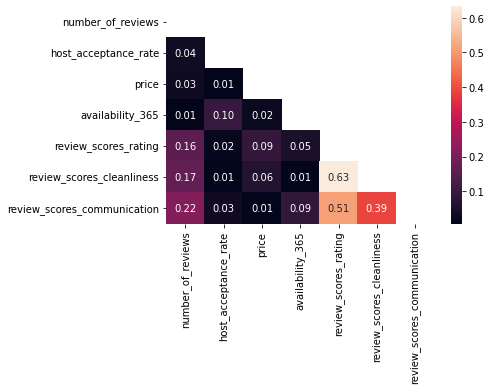

In [30]:
#Mapa de correlaciones
Corr_Factors=Home.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True,mask=mask, fmt='.2f')
Heat_Map

In [31]:
correlaciones(Home)

number_of_reviews vs host_acceptance_rate:  0.035752418063380864
number_of_reviews  vs review_scores_rating:  0.157328010263186
number_of_reviews  vs price:  0.02888420288605057
number_of_reviews  vs review_scores_cleanliness:  0.167541989354215
number_of_reviews  vs availability_365:  0.007362305529887736
number_of_reviews  vs review_scores_communication:  0.21556537098994927


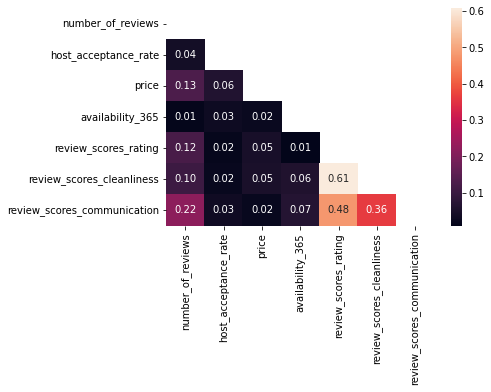

In [32]:
#Mapa de correlaciones
Corr_Factors=Room.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask, fmt='.2f')
Heat_Map

In [33]:
correlaciones(Room)

number_of_reviews vs host_acceptance_rate:  0.04073875349648917
number_of_reviews  vs review_scores_rating:  0.12315997192572782
number_of_reviews  vs price:  0.13020175688118255
number_of_reviews  vs review_scores_cleanliness:  0.10359983617832863
number_of_reviews  vs availability_365:  0.014562909198526649
number_of_reviews  vs review_scores_communication:  0.2211513282557487


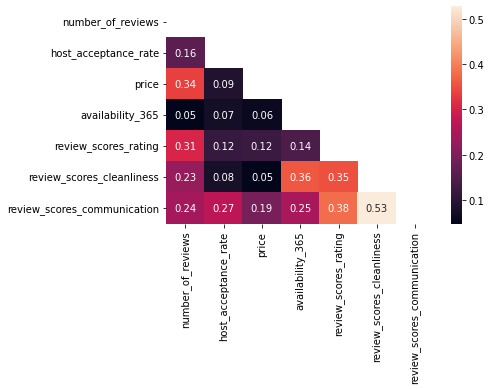

In [34]:
#Mapa de correlaciones
Corr_Factors=Shared.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [35]:
correlaciones(Shared)

number_of_reviews vs host_acceptance_rate:  0.1630317826712675
number_of_reviews  vs review_scores_rating:  0.3058949980127007
number_of_reviews  vs price:  0.33721594457264964
number_of_reviews  vs review_scores_cleanliness:  0.22948289885177564
number_of_reviews  vs availability_365:  0.04829408902094025
number_of_reviews  vs review_scores_communication:  0.2435256414177619


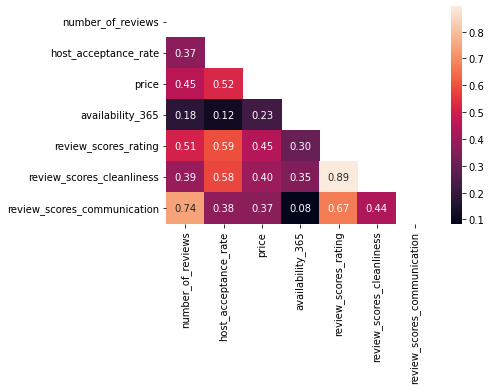

In [36]:
#Mapa de correlaciones
Corr_Factors=Hotel.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [37]:
correlaciones(Hotel)

number_of_reviews vs host_acceptance_rate:  0.36804799358454887
number_of_reviews  vs review_scores_rating:  0.5101556860434097
number_of_reviews  vs price:  0.45481408596434614
number_of_reviews  vs review_scores_cleanliness:  0.39410311459842606
number_of_reviews  vs availability_365:  0.1767059105242251
number_of_reviews  vs review_scores_communication:  0.7428659501515215


#PUNTO 5

HOME

In [38]:
Home.columns

Index(['number_of_reviews', 'host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'room_type'],
      dtype='object')

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [40]:
Var_Dep=Home['number_of_reviews']
Var_Indep=Home[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [41]:
model.fit(X=Var_Indep, y=Var_Dep)
model.__dict__
model.score(X=Var_Indep,y=Var_Dep)

0.0568521410164583

PRIVATE ROOM

In [42]:
modelP=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [43]:
PVar_Dep=Room['number_of_reviews']
PVar_Indep=Room[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [44]:
modelP.fit(X=PVar_Indep, y=PVar_Dep)
modelP.__dict__
modelP.score(X=PVar_Indep,y=PVar_Dep)

0.06869581305305383

SHARED ROOM

In [45]:
modelS=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [46]:
SVar_Dep=Shared['number_of_reviews']
SVar_Indep=Shared[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [47]:
modelS.fit(X=SVar_Indep, y=SVar_Dep)
modelS.__dict__
modelS.score(X=SVar_Indep,y=SVar_Dep)

0.24906437679674664

HOTEL ROOM

In [48]:
modelH=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [49]:
HVar_Dep=Hotel['number_of_reviews']
HVar_Indep=Hotel[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [50]:
modelH.fit(X=HVar_Indep, y=HVar_Dep)
modelH.__dict__
modelH.score(X=HVar_Indep,y=HVar_Dep)

0.6153172064884358

#PUNTO 6

In [51]:
#Home
coef_Deter=model.score(X=Var_Indep,y=Var_Dep)
coef_Deter

0.0568521410164583

In [52]:
#Home
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2384368700861054

In [53]:
#Private Room
coef_DeterP=modelP.score(X=PVar_Indep,y=PVar_Dep)
coef_DeterP

0.06869581305305383

In [54]:
#Private Room
coef_Correlp=np.sqrt(coef_DeterP)
coef_Correlp

0.2620988612204445

In [55]:
#Shared Room
coef_Deters=modelS.score(X=SVar_Indep,y=SVar_Dep)
coef_Deters

0.24906437679674664

In [56]:
#Shared Room
coef_Correls=np.sqrt(coef_Deters)
coef_Correls

0.49906349976405473

In [57]:
#Hotel Room
coef_Deterh=modelH.score(X=HVar_Indep,y=HVar_Dep)
coef_Deterh

0.6153172064884358

In [58]:
#Hotel Room
coef_Correlh=np.sqrt(coef_Deterh)
coef_Correlh

0.7844215744664573

In [59]:
Tabla = pd.DataFrame()

In [60]:
Tabla['Tipo de habitacion'] = ['Entire room/apt', 'Private room', 'Shared room', 'Hotel room']
Tabla['Coef_det']=[coef_Deter,coef_DeterP,coef_Deters,coef_Deterh]
Tabla['Coef_Correl']=[coef_Correl,coef_Correlp,coef_Correls,coef_Correlh]

In [61]:
print(Tabla)

  Tipo de habitacion  Coef_det  Coef_Correl
0    Entire room/apt  0.056852     0.238437
1       Private room  0.068696     0.262099
2        Shared room  0.249064     0.499063
3         Hotel room  0.615317     0.784422
